# Range Sum Query 2D - Immutable

Given a 2D matrix matrix, handle multiple queries of the following type:

- Calculate the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).

Implement the NumMatrix class:

- NumMatrix(int[][] matrix) Initializes the object with the integer matrix matrix.
- int sumRegion(int row1, int col1, int row2, int col2) Returns the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).

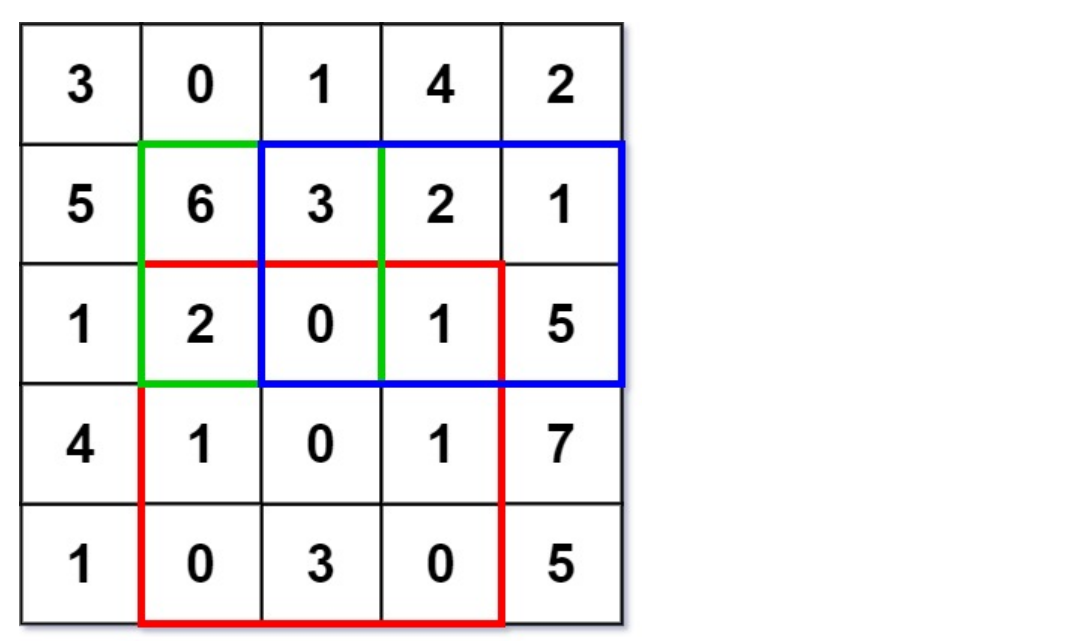

Example 1:

```
Input
["NumMatrix", "sumRegion", "sumRegion", "sumRegion"]
[[[[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]], [2, 1, 4, 3], [1, 1, 2, 2], [1, 2, 2, 4]]
Output
[null, 8, 11, 12]

Explanation
NumMatrix numMatrix = new NumMatrix([[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]);
numMatrix.sumRegion(2, 1, 4, 3); // return 8 (i.e sum of the red rectangle)
numMatrix.sumRegion(1, 1, 2, 2); // return 11 (i.e sum of the green rectangle)
numMatrix.sumRegion(1, 2, 2, 4); // return 12 (i.e sum of the blue rectangle)
```

Constraints:
```
m == matrix.length
n == matrix[i].length
1 <= m, n <= 200
-105 <= matrix[i][j] <= 105
0 <= row1 <= row2 < m
0 <= col1 <= col2 < n
At most 104 calls will be made to sumRegion.
```

# Solution : Dynamic Programming

In [5]:
class NumMatrix:

    # time = O(wh)
    # space = O(wh)
    # wh = width * height of matrix
    def __init__(self, matrix):
        if len(matrix) == 0 or len(matrix[0]) == 0:
            return
        self.cache = [[0 for _ in range(len(matrix[0]) + 1)] for _ in range(len(matrix) + 1)]
        
        for i in range(1, len(matrix) + 1):
            for j in range(1, len(matrix[0]) + 1):
                self.cache[i][j] = matrix[i - 1][j - 1] + self.cache[i - 1][j] + self.cache[i][j - 1] - self.cache[i - 1][j - 1]
        

    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        return self.cache[row2 + 1][col2 + 1] - self.cache[row1][col2 + 1] - self.cache[row2 + 1][col1] + self.cache[row1][col1]

In [8]:
matrix = [[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]
c = NumMatrix(matrix)
print(c.sumRegion(2, 1, 4, 3)) # expected = 8
print(c.sumRegion(1, 1, 2, 2)) # expected = 11
print(c.sumRegion(1, 2, 2, 4)) # expected = 12


8
11
12


## Conceptual Note

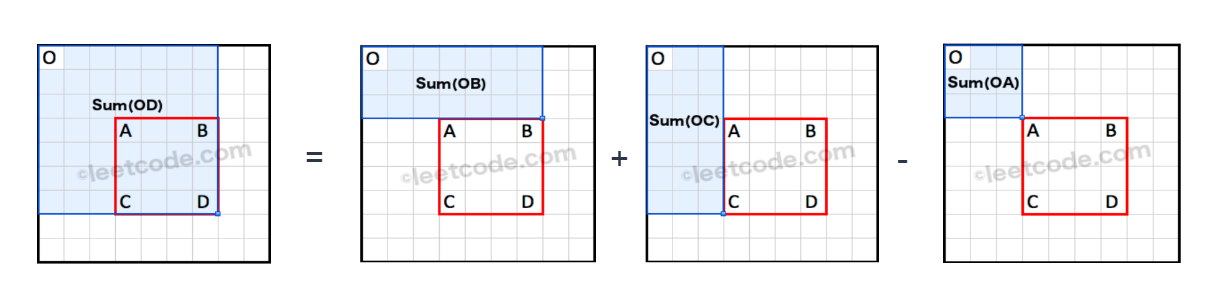